#### 목표 : 생선 품종 분류 모델
- 데이터 : fish.csv
- 피쳐 : Weight, Length
- 타겟 : Species
- 유형 : 지도학습 / 분류

(1) 모듈 로딩 & 데이터 준비

In [1]:
import matplotlib.pyplot as plt
import pandas as pd                                     # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier      # 기계학습 관련 모듈
import matplotlib.pyplot as plt

In [2]:
data_file = '../data/fish.csv'

In [3]:
# 5개 피쳐/특성 중 2개 피쳐/특성 선택
fishDF = pd.read_csv(data_file, usecols=[0,1,2])
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [4]:
# Bream, Smelt 품종 행만 추출
mask = fishDF['Species'].isin(['Bream', 'Smelt'])   # Boolean Indexing

# 해당 행만 도출
twofishDF = fishDF[mask]
twofishDF.index

# 인덱스 정리
twofishDF.reset_index(drop=True, inplace=True)
twofishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [5]:
# Bream, Smelt 품종명을 수치화
# twofishDF.Species = twofishDF.Species.replace({'Bream':0, 'Smelt':1}).copy()
twofishDF.loc[:, 'Species'] = twofishDF.Species.replace({'Bream':0, 'Smelt':1}).copy()
twofishDF['Species'] = twofishDF['Species'].astype('int32').copy()

C:\Users\kdp\AppData\Local\Temp\ipykernel_14672\1337506430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twofishDF['Species'] = twofishDF['Species'].astype('int32').copy()


In [6]:
twofishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     int32  
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), int32(1)
memory usage: 1.1 KB


#(2) 데이터 전처리

<Axes: xlabel='Length', ylabel='Weight'>

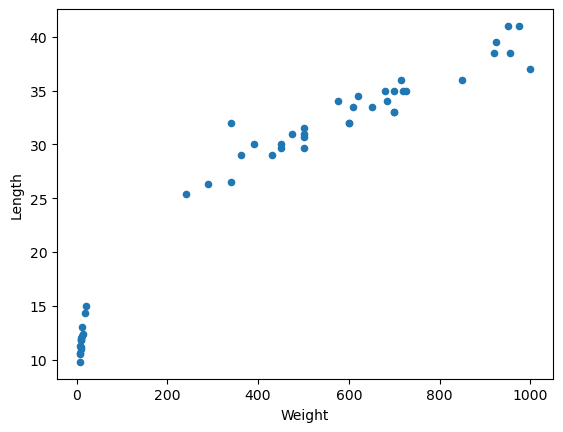

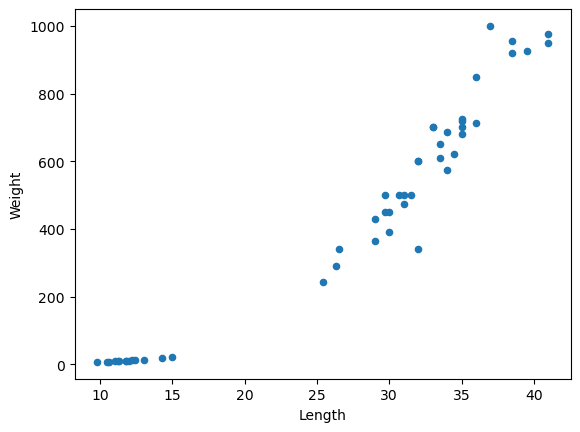

In [7]:
# Weight, Length로 품종 구별이 가능한지 시각화 확인
twofishDF.plot(kind='scatter', x='Weight', y='Length')
twofishDF.plot(kind='scatter', x='Length', y='Weight')

(3) 기계학습을 위한 데이터 준비
- 피쳐/특성 + 타겟/라벨/클래스
- 학습용 데이터셋  : 80%
- 테스트용 데이터셋 : 20%

In [8]:
# 학습과 테스트 비율 조절 갯수 계산
num = round(twofishDF.shape[0] * 0.8)

# 학습 데이터셋 추출
trainDF = twofishDF.iloc[:num+1]

# 테스트 데이터셋 추출
testDF = twofishDF.iloc[num+1:]

(3-1) 직접 타겟/라벨 컬럼의 비율을 고려해서 학습&테스트용 데이터셋 준비

In [9]:
# 데이터 섞기 => 100% 모두 섞기
twofishDF = twofishDF.sample(frac=1.)

print(twofishDF.shape)
twofishDF

(49, 3)


,Species,Weight,Length
24,0,700.0,35.0
34,0,950.0,41.0
5,0,450.0,29.7
16,0,700.0,33.0
30,0,920.0,38.5
0,0,242.0,25.4
4,0,430.0,29.0
29,0,1000.0,37.0
33,0,975.0,41.0
6,0,500.0,29.7


(3-2) scikit-learn 모듈 활용한 학습&테스트용 데이터셋 준비

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# 특성과 타겟 분리
featureDF = twofishDF[twofishDF.columns[1:]]
targetSR = twofishDF.Species

print(f'featureDF=> {featureDF.shape}\n{featureDF.head(2)}')
print(f'targetSR=> {targetSR.shape}\n{targetSR.head(2)}')

featureDF=> (49, 2)
    Weight  Length
24   700.0    35.0
34   950.0    41.0
targetSR=> (49,)
24    0
34    0
Name: Species, dtype: int32


In [12]:
## 비율 설정 없이 학습/테스트셋 분리
## [전달] 피쳐 데이터, 타겟 데이터
## [기본] shuffle=True, train:test = 0.75:0.25
## [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟
X_train, X_test, Y_train, Y_test = train_test_split(featureDF, targetSR)

In [13]:
print(f'X_train : {X_train.shape}, Y_train : {Y_train.shape}')
print(X_train.head(2), Y_train.head(2), sep='\n')

print(f'X_test : {X_test.shape}, Y_test : {Y_test.shape}')
print(X_test.head(2), Y_test.head(2), sep='\n')

# 타겟/클래스 비율
print(f'{Y_train.value_counts()/Y_train.shape[0]}')
print(f'{Y_test.value_counts()/Y_test.shape[0]}')

X_train : (36, 2), Y_train : (36,)
    Weight  Length
48    19.9    15.0
22   620.0    34.5
48    1
22    0
Name: Species, dtype: int32
X_test : (13, 2), Y_test : (13,)
    Weight  Length
3    363.0    29.0
35     6.7     9.8
3     0
35    1
Name: Species, dtype: int32
Species
0    0.694444
1    0.305556
Name: count, dtype: float64
Species
0    0.769231
1    0.230769
Name: count, dtype: float64


In [14]:
## 비율 설정 없이 학습/테스트셋 분리
## [전달] 피쳐 데이터, 타겟 데이터
## [기본] shuffle=True
## [설정] train:test = 0.8:0.2
## [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟
X_train, X_test, Y_train, Y_test = train_test_split(featureDF, targetSR,
                                                    test_size=0.2)

In [15]:
print(f'X_train : {X_train.shape}, Y_train : {Y_train.shape}')
print(X_train.head(2), Y_train.head(2), sep='\n')

print(f'X_test : {X_test.shape}, Y_test : {Y_test.shape}')
print(X_test.head(2), Y_test.head(2), sep='\n')

X_train : (39, 2), Y_train : (39,)
    Weight  Length
43     9.8    12.0
38     9.7    11.0
43    1
38    1
Name: Species, dtype: int32
X_test : (10, 2), Y_test : (10,)
    Weight  Length
34   950.0    41.0
40     8.7    11.3
34    0
40    1
Name: Species, dtype: int32


In [16]:
## 비율 설정 없이 학습/테스트셋 분리
## [전달] 피쳐 데이터, 타겟 데이터
## [기본] shuffle=True
## [설정] train:test = 0.8:0.2
##       분류의 경우 target이 불균형일 경우 비율 지정하는 stratify 매개변수를 target으로 설정
## [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟
X_train, X_test, Y_train, Y_test = train_test_split(featureDF, targetSR,
                                                    test_size=0.2,
                                                    stratify=targetSR)

In [17]:
# 검증용 데이터셋 준비
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                    test_size=0.1,
                                                    stratify=Y_train)

In [18]:
print(f'X_train : {X_train.shape}, Y_train : {Y_train.shape}')
print(X_train.head(2), Y_train.head(2), sep='\n')

print(f'X_val : {X_val.shape}, Y_val : {Y_val.shape}')
print(X_val.head(2), Y_val.head(2), sep='\n')

print(f'X_test : {X_test.shape}, Y_test : {Y_test.shape}')
print(X_test.head(2), Y_test.head(2), sep='\n')

X_train : (35, 2), Y_train : (35,)
    Weight  Length
48    19.9    15.0
7    390.0    30.0
48    1
7     0
Name: Species, dtype: int32
X_val : (4, 2), Y_val : (4,)
    Weight  Length
0    242.0    25.4
20   575.0    34.0
0     0
20    0
Name: Species, dtype: int32
X_test : (10, 2), Y_test : (10,)
    Weight  Length
21   685.0    34.0
9    500.0    30.7
21    0
9     0
Name: Species, dtype: int32


(4) 학습 진행
- 학습 방법 : 지도학습 / 분류 => KNN
- 모델 인스턴스 생성 => fit() 메소드

In [19]:
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [20]:
Y_train.info()

<class 'pandas.core.series.Series'>
Index: 35 entries, 48 to 37
Series name: Species
Non-Null Count  Dtype
--------------  -----
35 non-null     int32
dtypes: int32(1)
memory usage: 420.0 bytes


In [21]:
# 학습 진행 => 학습용 데이터 진행
model.fit(X_train, Y_train)

KNeighborsClassifier()

(5) 테스트 진행 => 학습에 사용되지 않은 데이터로 진행

In [22]:
model.score(X_val, Y_val)

1.0

(6) 모델 활용 예측 => 새로운 데이터로 진행

In [23]:
model.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [24]:
Y_test

21    0
9     0
13    0
29    0
41    1
36    1
19    0
8     0
39    1
23    0
Name: Species, dtype: int32

(6-1) 사용자로부터 전달받은 새로운 데이터에 대한 예측
==> 학습할 때 전달되는 피쳐형태와 동일한 데이터

In [27]:
# 길이 25, 무게 160인 생선의 품종 예측
new_data = pd.DataFrame([[160, 25]], columns=twofishDF.columns[1:])
new_data

,Weight,Length
0,160,25


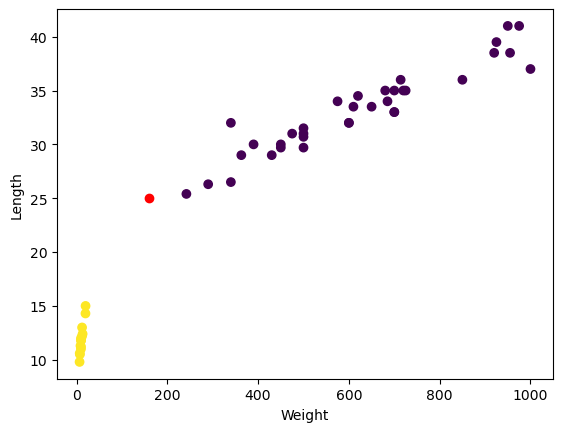

In [29]:
# 새로운 데이터와 학습 데이터의 시각화
plt.plot(new_data.Weight, new_data.Length, 'ro')

# 학습 데이터 시각화
plt.scatter(twofishDF.Weight, twofishDF.Length, c=twofishDF.Species)
plt.ylabel('Length')
plt.xlabel('Weight')
plt.show()

In [30]:
dis, ind = model.kneighbors(new_data)
ind

array([[ 9,  0, 10,  4, 27]], dtype=int64)